In [ ]:
import tensorflow as tf
# from tensorflow.keras.layers import Conv2D, BatchNormalization, Activation, Add, Input, MaxPooling2D, AveragePooling2D, Flatten, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Input, Conv2D, BatchNormalization, Activation, Add, MaxPooling2D, AveragePooling2D, Flatten, Dense



The complete architecture of a ResNet50 can be shown as follows:

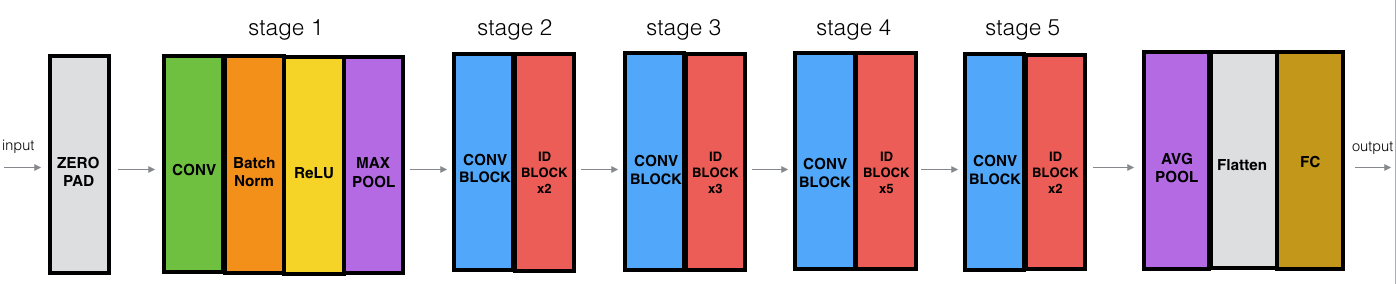

Starting first with the identity block creation

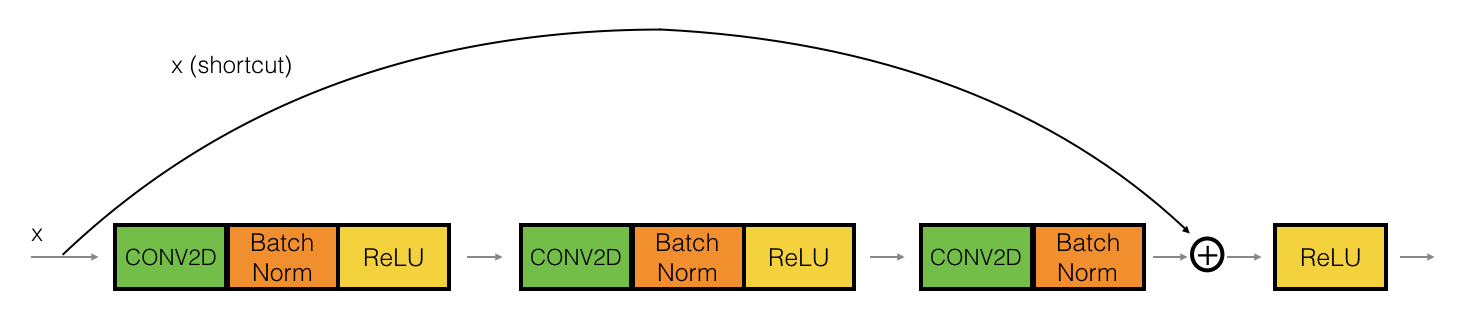

refer : https://www.kaggle.com/code/sandy1112/create-and-train-resnet50-from-scratch?fbclid=IwAR3vCt7ZkSmvy3FK23wkOqzq8FyBsccXZmw-p0jt924kEAsHOT5Gm40wP88

In [ ]:
from google.colab import drive
from google.colab import files

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Dataset paths in Google Drive
train_data_dir = '/content/drive/MyDrive/restnet/train'
validation_data_dir = '/content/drive/MyDrive/restnet/valid'

In [ ]:
# Constants
img_width, img_height = 224, 224
batch_size = 32
num_epochs = 50
num_classes = 2  # Apple and Banana


In [ ]:
def conv_block(inputs, filters, kernel_size, strides):
    x = Conv2D(filters, kernel_size, strides=strides, padding='same')(inputs)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    return x

def identity_block(inputs, filters, kernel_size):
    x = Conv2D(filters, kernel_size, padding='same')(inputs)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = Conv2D(filters, kernel_size, padding='same')(x)
    x = BatchNormalization()(x)
    x = Add()([x, inputs])
    x = Activation('relu')(x)
    return x

def residual_block(inputs, filters, kernel_size, strides):
    x = conv_block(inputs, filters, kernel_size, strides)
    x = identity_block(x, filters, kernel_size)
    x = identity_block(x, filters, kernel_size)
    return x

def build_resnet50(input_shape=(224, 224, 3), num_classes=1000):
    inputs = Input(shape=input_shape)

    # Initial Convolution and Pooling
    x = conv_block(inputs, filters=64, kernel_size=(7, 7), strides=(2, 2))
    x = MaxPooling2D(pool_size=(3, 3), strides=(2, 2), padding='same')(x)

    # Residual blocks
    x = residual_block(x, filters=64, kernel_size=(3, 3), strides=(1, 1))
    x = residual_block(x, filters=128, kernel_size=(3, 3), strides=(2, 2))
    x = residual_block(x, filters=256, kernel_size=(3, 3), strides=(2, 2))
    x = residual_block(x, filters=512, kernel_size=(3, 3), strides=(2, 2))

    # Final layers
    x = AveragePooling2D(pool_size=(7, 7))(x)
    x = Flatten()(x)
    x = Dense(num_classes, activation='softmax')(x)

    model = Model(inputs=inputs, outputs=x, name='resnet50')
    return model




In [ ]:
# Instantiate the ResNet-50 model
resnet50_model = build_resnet50()

# Print model summary
resnet50_model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 112, 112, 64  9472        ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 112, 112, 64  256        ['conv2d[0][0]']                 
 alization)                     )                                                          

In [ ]:

# Instantiate the ResNet-50 model
resnet50_model = build_resnet50(input_shape=(img_width, img_height, 3), num_classes=num_classes)

# Compile the model
resnet50_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Create data generators
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical'
)

validation_generator = validation_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical'
)


Found 235 images belonging to 2 classes.
Found 49 images belonging to 2 classes.


In [ ]:

# Constants
img_width, img_height = 224, 224


def conv_block(inputs, filters, kernel_size, strides):
    x = Conv2D(filters, kernel_size, strides=strides, padding='same')(inputs)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    return x

def identity_block(inputs, filters, kernel_size):
    x = Conv2D(filters, kernel_size, padding='same')(inputs)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = Conv2D(filters, kernel_size, padding='same')(x)
    x = BatchNormalization()(x)
    x = Add()([x, inputs])
    x = Activation('relu')(x)
    return x

def residual_block(inputs, filters, kernel_size, strides):
    x = conv_block(inputs, filters, kernel_size, strides)
    x = identity_block(x, filters, kernel_size)
    x = identity_block(x, filters, kernel_size)
    return x

def build_resnet50(input_shape=(img_width, img_height, 3), num_classes=1000):
    inputs = Input(shape=input_shape)

    # Initial Convolution and Pooling
    x = conv_block(inputs, filters=64, kernel_size=(7, 7), strides=(2, 2))
    x = MaxPooling2D(pool_size=(3, 3), strides=(2, 2), padding='same')(x)

    # Residual blocks
    x = residual_block(x, filters=64, kernel_size=(3, 3), strides=(1, 1))
    x = residual_block(x, filters=128, kernel_size=(3, 3), strides=(2, 2))
    x = residual_block(x, filters=256, kernel_size=(3, 3), strides=(2, 2))
    x = residual_block(x, filters=512, kernel_size=(3, 3), strides=(2, 2))

    # Final layers
    x = AveragePooling2D(pool_size=(7, 7))(x)
    x = Flatten()(x)
    x = Dense(num_classes, activation='softmax')(x)

    model = Model(inputs=inputs, outputs=x, name='resnet50')
    return model

# Instantiate the ResNet-50 model
resnet50_model = build_resnet50()

# Print model summary
resnet50_model.summary()


Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_42 (Conv2D)             (None, 112, 112, 64  9472        ['input_3[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization_42 (BatchN  (None, 112, 112, 64  256        ['conv2d_42[0][0]']              
 ormalization)                  )                                                          

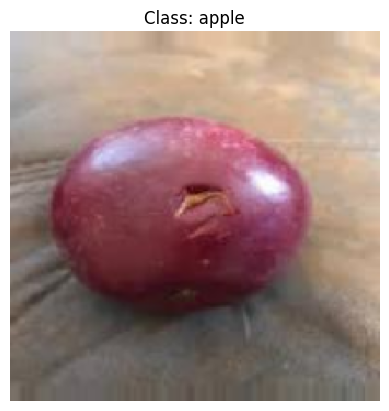

11

In [ ]:
# shows training 4th image
import numpy as np

import matplotlib.pyplot as plt

# Fetch the 4th training image
image_index = 7  # The 4th image (indexes start from 0)
image_batch, label_batch = train_generator[image_index]

# Convert the image batch to a single image
image = image_batch[0]

# Convert the one-hot encoded label to a class label
class_labels = list(train_generator.class_indices.keys())
class_label = class_labels[np.argmax(label_batch[0])]

# Show the image using matplotlib
plt.imshow(image)
plt.title(f"Class: {class_label}")
plt.axis('off')
plt.show()
len(image_batch)


In [ ]:

# Instantiate the ResNet-50 model
model = build_resnet50(input_shape=(img_width, img_height, 3), num_classes=num_classes)

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

#for data agmunetation

# Create data generators
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    rotation_range=20,  # Rotate images randomly between -20 and +20 degrees
    width_shift_range=0.2,  # Shift images horizontally by a maximum of 20% of the image width
    height_shift_range=0.2,  # Shift images vertically by a maximum of 20% of the image height
    fill_mode='nearest'  # Fill newly created pixels with the nearest pixel value
)

validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical'
)

validation_generator = validation_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical'
)


Found 235 images belonging to 2 classes.
Found 49 images belonging to 2 classes.


In [ ]:
class_labels = train_generator.class_indices
print(class_labels)


{'apple': 0, 'banana': 1}


In [ ]:
#constant
batch_size = 32
num_epochs = 100
num_classes = 2  # Apple and Banana

In [ ]:

from tensorflow.keras.callbacks import ModelCheckpoint

# Define the filepath where the model checkpoints will be saved
checkpoint_filepath = '/content/drive/MyDrive/resnet/checkpoints/model_checkpoint.h5'

# Define the ModelCheckpoint callback
checkpoint_callback = ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_freq='epoch',  # Save the model at the end of every epoch
    save_weights_only=False,  # Save the entire model (including architecture)
    period=10  # Save every 10 epochs
)

# Train the model with the ModelCheckpoint callback
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size,
    epochs=num_epochs,
    callbacks=[checkpoint_callback]  # Add the checkpoint callback to the training process
)

# Save the final trained model as an .h5 file on Google Drive
model.save('/content/drive/MyDrive/resnet/trained_model.h5')

Epoch 1/100
7/7 [==============================] - 4s 505ms/step - loss: 0.0328 - accuracy: 0.9901 - val_loss: 0.0934 - val_accuracy: 0.9688
Epoch 2/100
7/7 [==============================] - 5s 650ms/step - loss: 0.0426 - accuracy: 0.9951 - val_loss: 0.1966 - val_accuracy: 0.9688
Epoch 3/100
7/7 [==============================] - 3s 543ms/step - loss: 0.0179 - accuracy: 0.9951 - val_loss: 0.1821 - val_accuracy: 0.9688
Epoch 4/100
7/7 [==============================] - 3s 469ms/step - loss: 0.0205 - accuracy: 0.9901 - val_loss: 0.1952 - val_accuracy: 0.9688
Epoch 5/100
7/7 [==============================] - 5s 679ms/step - loss: 0.0164 - accuracy: 0.9901 - val_loss: 0.2774 - val_accuracy: 0.9375
Epoch 6/100
7/7 [==============================] - 4s 468ms/step - loss: 0.0393 - accuracy: 0.9803 - val_loss: 0.1961 - val_accuracy: 0.9688
Epoch 7/100
7/7 [==============================] - 3s 482ms/step - loss: 0.0443 - accuracy: 0.9852 - val_loss: 1.7866e-04 - val_accuracy: 1.0000
Epoch 8/1

In [ ]:
# code to load previsuoly trained model

import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import ModelCheckpoint

# Load the previously trained model
loaded_model = load_model('/content/drive/MyDrive/resnet/trained_model.h5')

# Compile the model with the same optimizer, loss, and metrics
loaded_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Define the number of additional epochs you want to train for
additional_epochs = 10

# Define the filepath where the model checkpoints will be saved during the additional training
checkpoint_filepath = '/content/drive/MyDrive/resnet/checkpoints/model_checkpoint_additional.h5'

# Define the ModelCheckpoint callback for additional training
checkpoint_callback = ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_freq='epoch',  # Save the model at the end of every epoch
    save_weights_only=False,  # Save the entire model (including architecture)
    period=5   # Save every 5 epochs
)

# Continue training the model for additional_epochs
history_additional = loaded_model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size,
    epochs=loaded_model.optimizer.iterations.numpy() + additional_epochs,
    callbacks=[checkpoint_callback]  # Add the checkpoint callback to the training process
)

# Save the final trained model as an .h5 file on Google Drive
model.save('/content/drive/MyDrive/resnet/trained_model.h5')


Epoch 1/10
7/7 [==============================] - 19s 658ms/step - loss: 0.1962 - accuracy: 0.9507 - val_loss: 0.6356 - val_accuracy: 0.7812
Epoch 2/10
7/7 [==============================] - 3s 532ms/step - loss: 0.1462 - accuracy: 0.9606 - val_loss: 27.4482 - val_accuracy: 0.6250
Epoch 3/10
7/7 [==============================] - 4s 499ms/step - loss: 0.1022 - accuracy: 0.9655 - val_loss: 15.8142 - val_accuracy: 0.7500
Epoch 4/10
7/7 [==============================] - 5s 663ms/step - loss: 0.1551 - accuracy: 0.9507 - val_loss: 4.6293 - val_accuracy: 0.9062
Epoch 5/10
7/7 [==============================] - 9s 1s/step - loss: 0.0711 - accuracy: 0.9704 - val_loss: 6.1209 - val_accuracy: 0.5938
Epoch 6/10
7/7 [==============================] - 5s 611ms/step - loss: 0.0742 - accuracy: 0.9754 - val_loss: 5.7269 - val_accuracy: 0.5312
Epoch 7/10
7/7 [==============================] - 4s 590ms/step - loss: 0.0338 - accuracy: 0.9866 - val_loss: 1.5009 - val_accuracy: 0.9062
Epoch 8/10
7/7 [====

In [ ]:
from google.colab import files

# Upload an image
uploaded = files.upload()

# Get the file path of the uploaded image
uploaded_image_path = list(uploaded.keys())[0]


Saving download (2).jfif to download (2).jfif


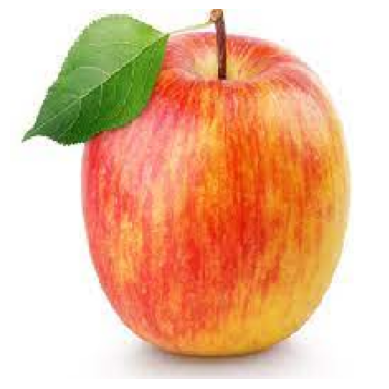

In [ ]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image


# Load the image
img = image.load_img(uploaded_image_path, target_size=(img_width, img_height))

# Display the image
plt.imshow(img)
plt.axis('off')
plt.show()


In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image

# Load the image
img = image.load_img(uploaded_image_path, target_size=(img_width, img_height))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0

# Make predictions
predictions = model.predict(img_array)
predicted_class_index = np.argmax(predictions[0])

# Map the class index to the corresponding class label
class_labels = train_generator.class_indices
predicted_class_label = list(class_labels.keys())[list(class_labels.values()).index(predicted_class_index)]

# Print the predicted class
print("Predicted class: ", predicted_class_label)


1/1 [==============================] - 0s 24ms/step
Predicted class:  apple


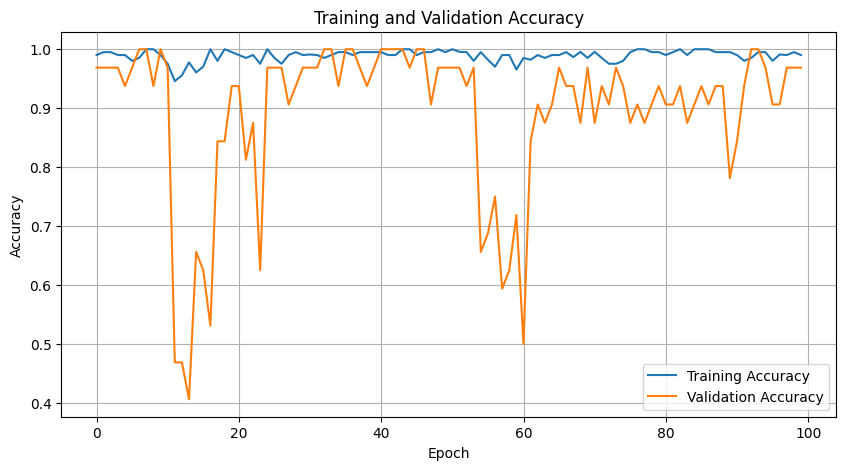

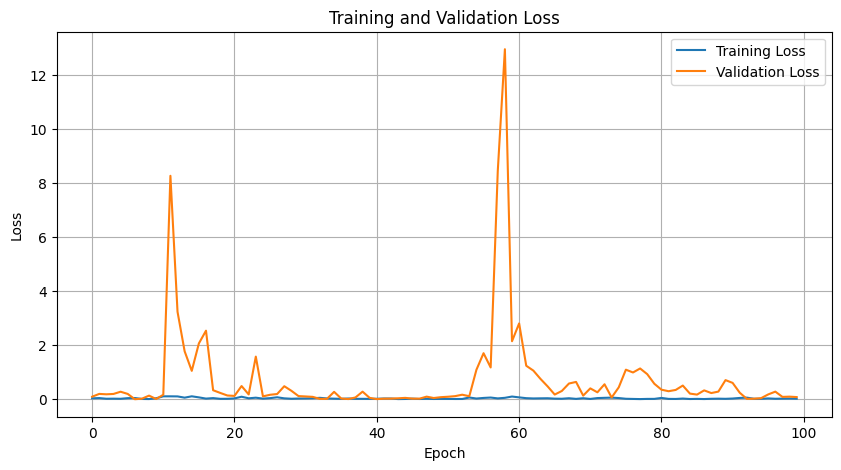

In [ ]:
import matplotlib.pyplot as plt

# Plot the training and validation accuracy over epochs
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.grid()
plt.show()

# Plot the training and validation loss over epochs
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid()
plt.show()


In [ ]:
# Create a new model that outputs the activations of each layer in the original ResNet50 model
layer_outputs = [layer.output for layer in resnet50_model.layers]
feature_extraction_model = Model(inputs=resnet50_model.input, outputs=layer_outputs)


1/1 [==============================] - 1s 503ms/step


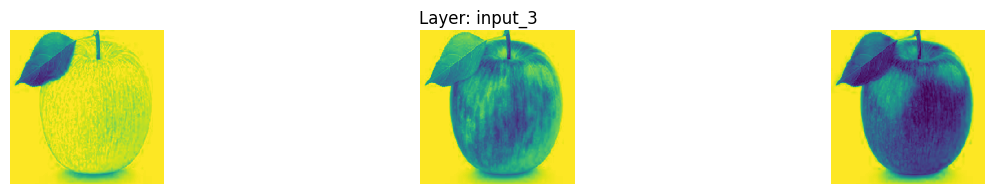

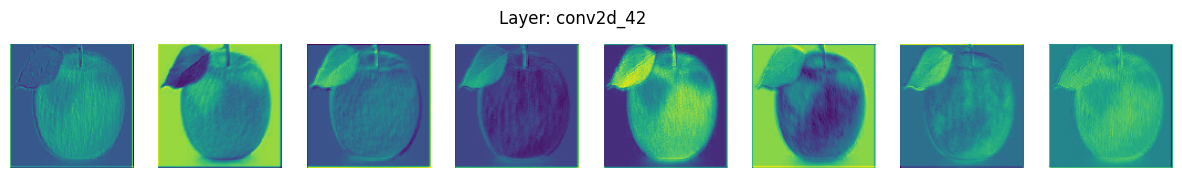

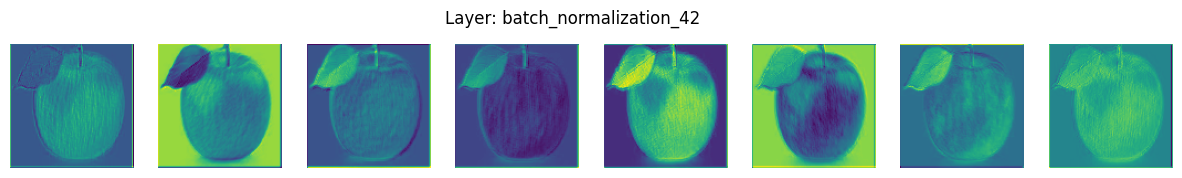

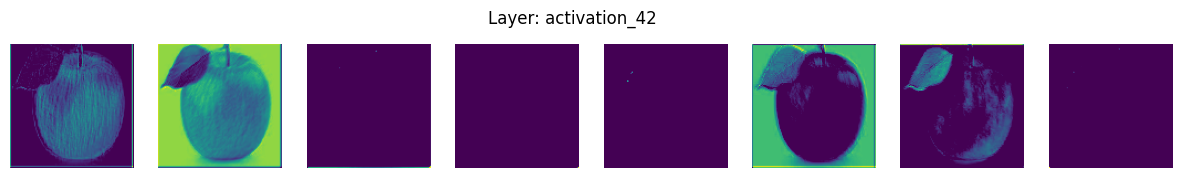

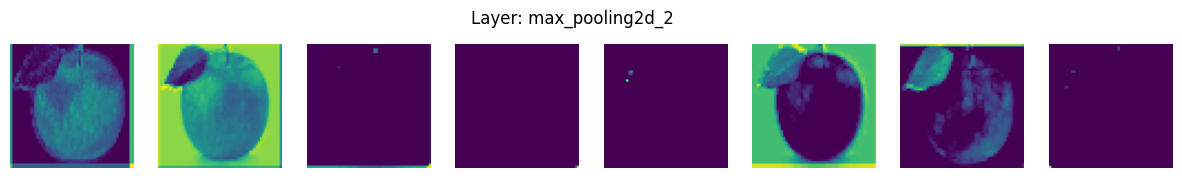

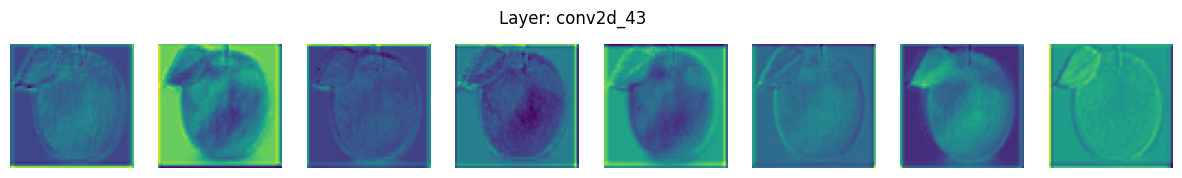

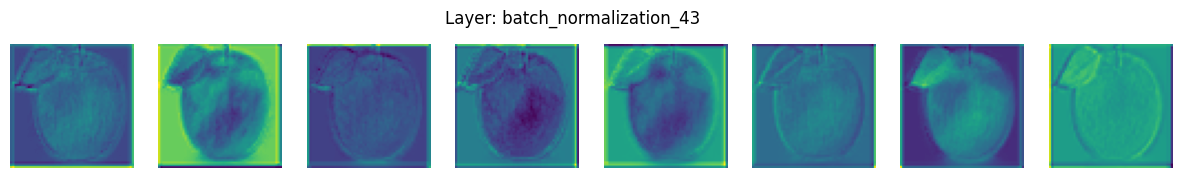

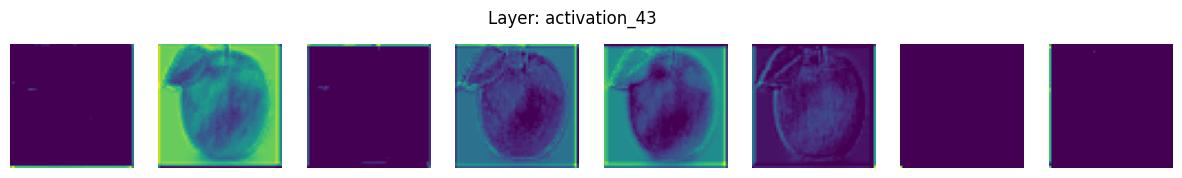

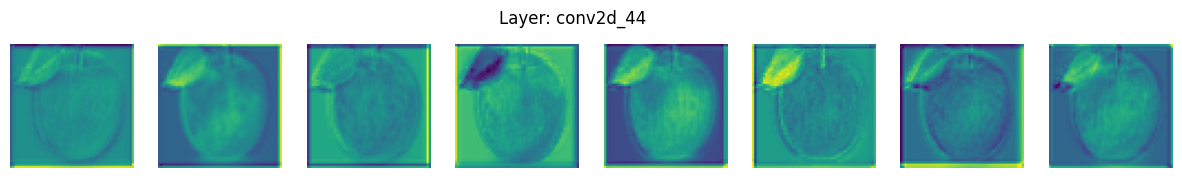

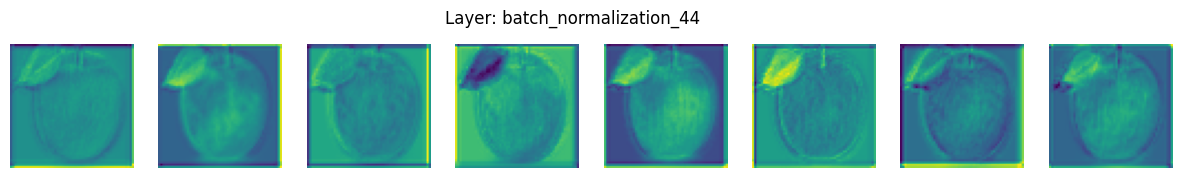

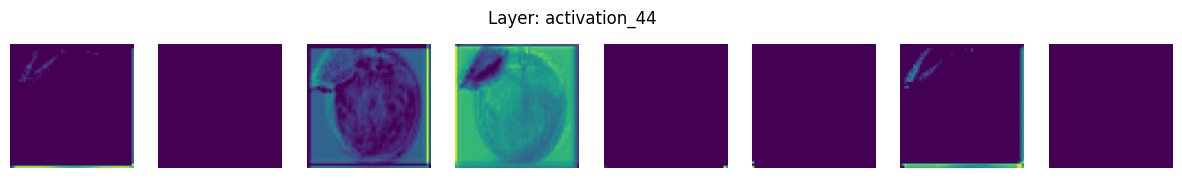

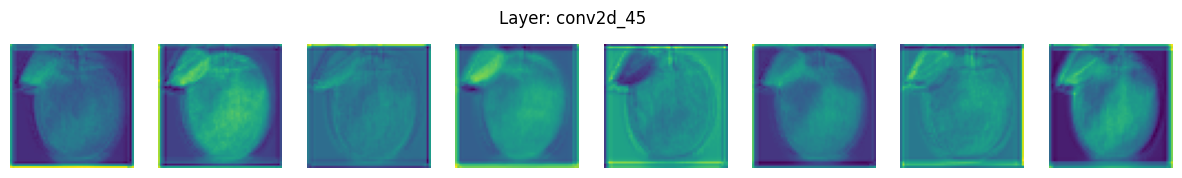

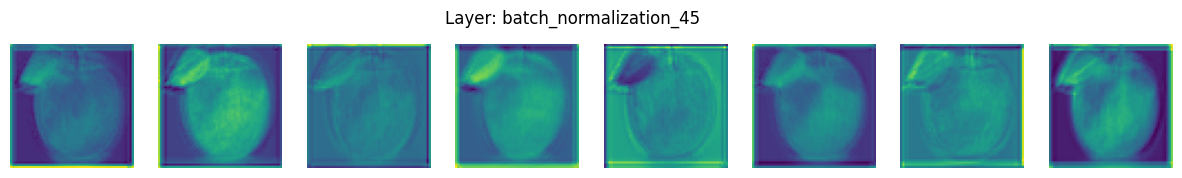

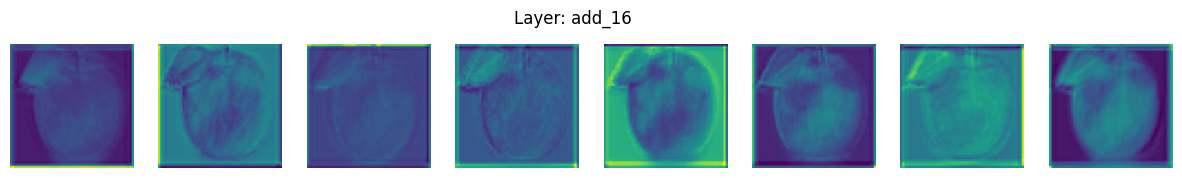

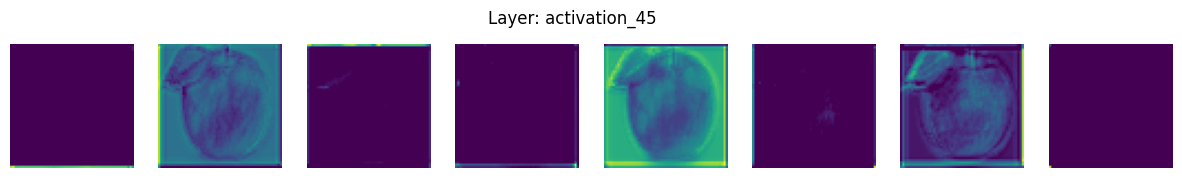

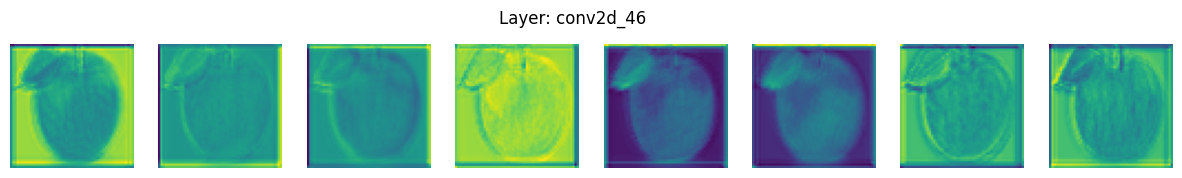

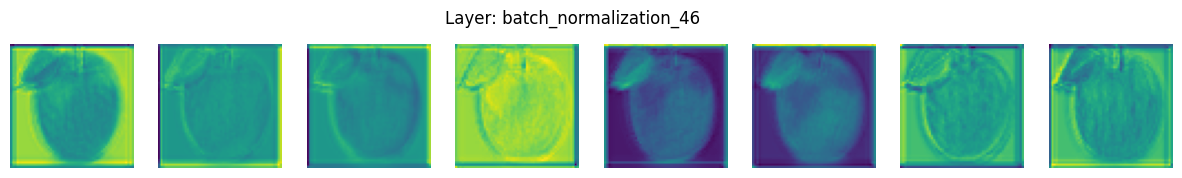

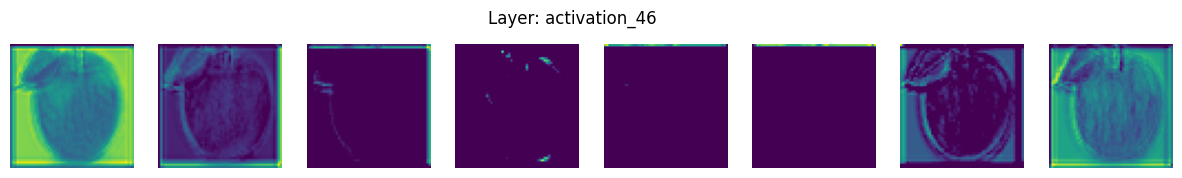

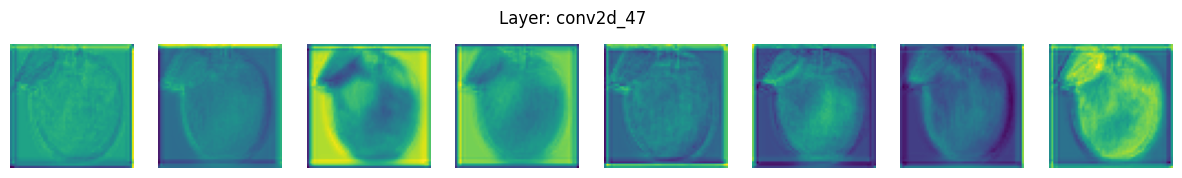

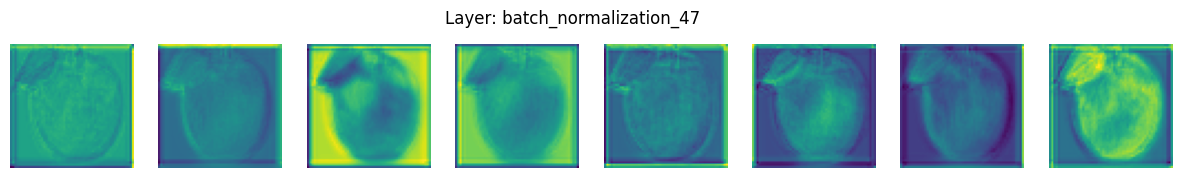

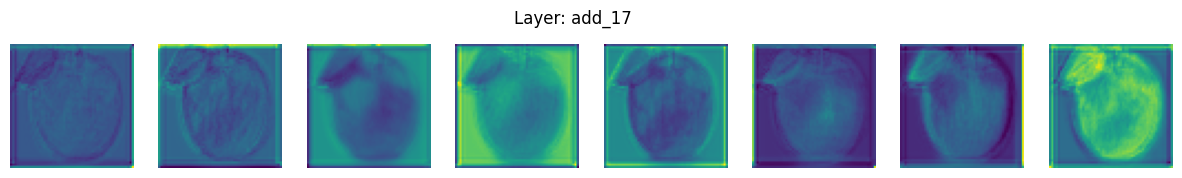

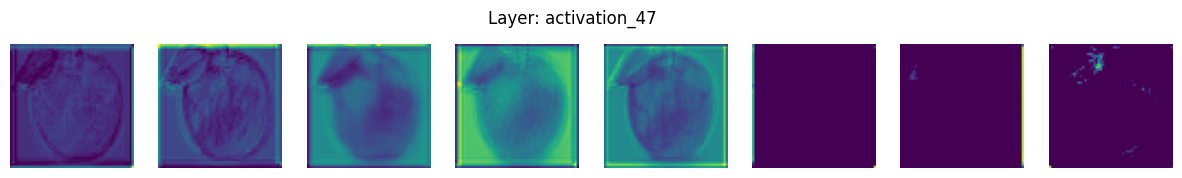

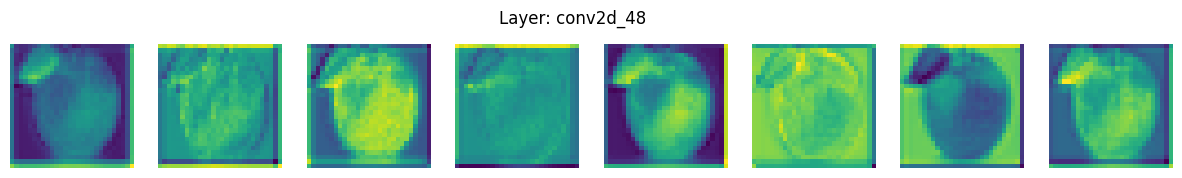

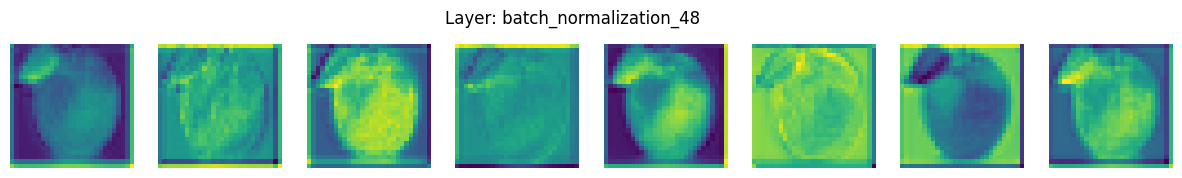

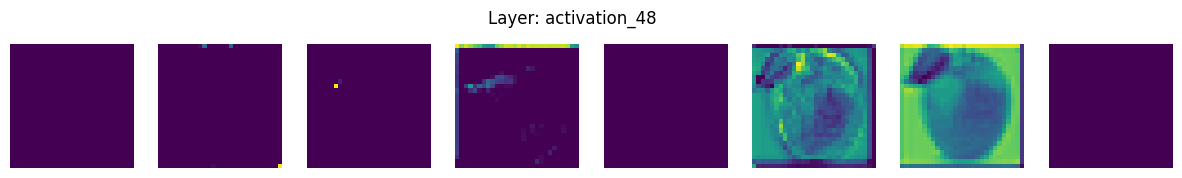

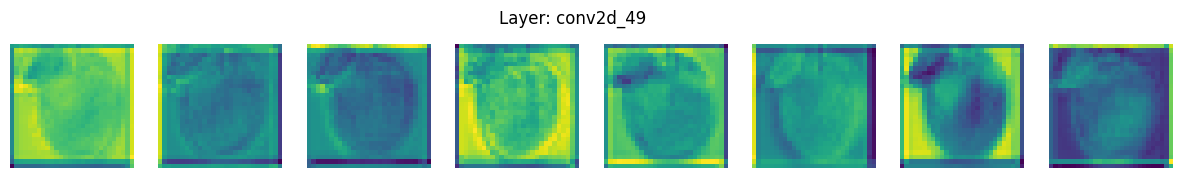

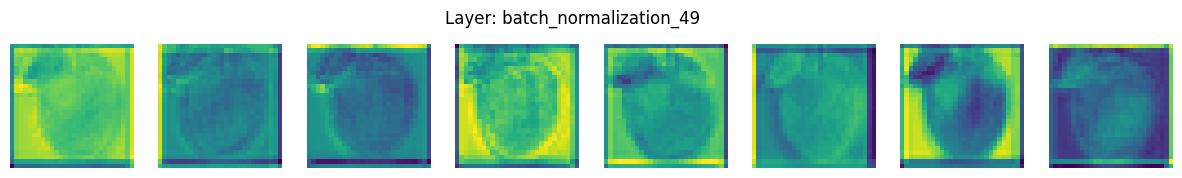

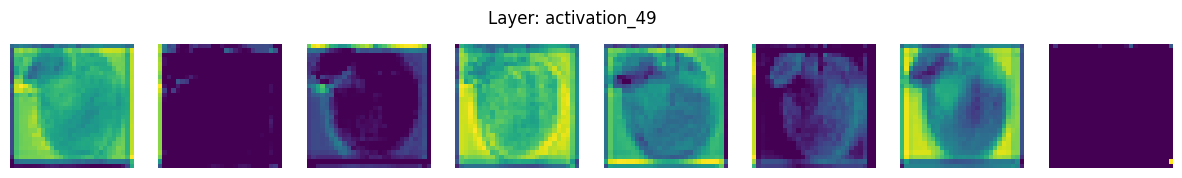

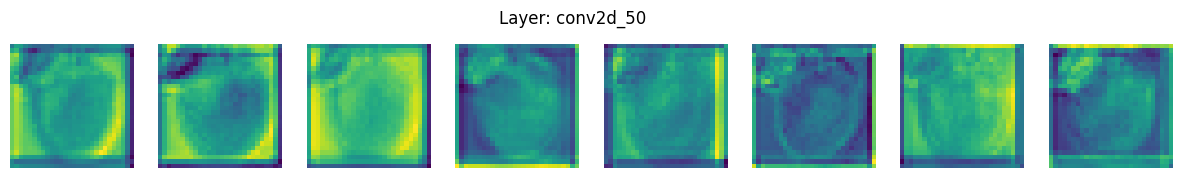

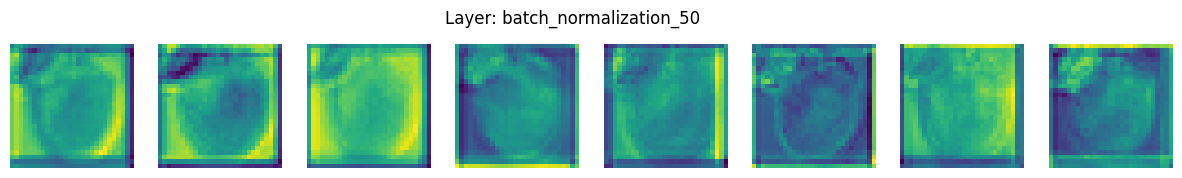

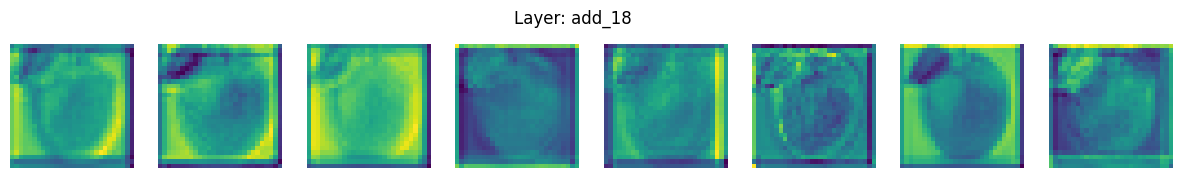

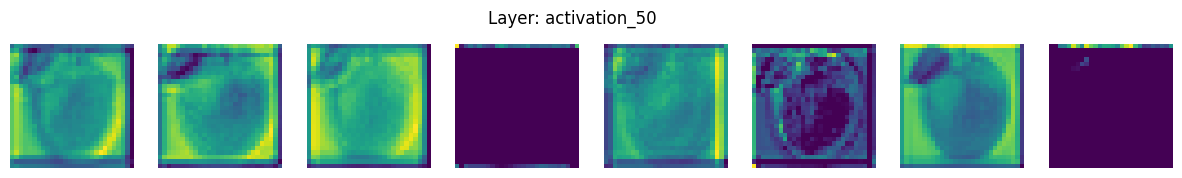

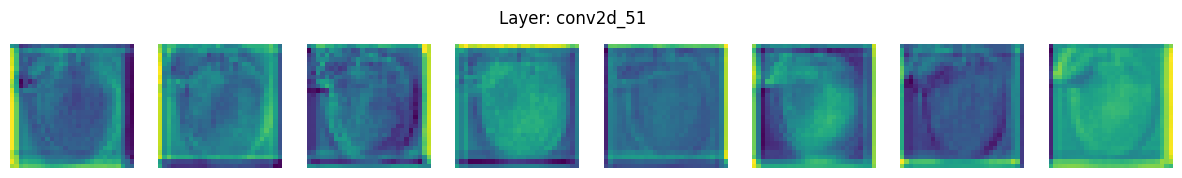

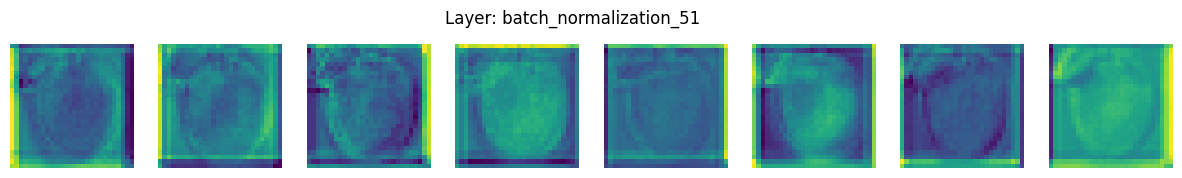

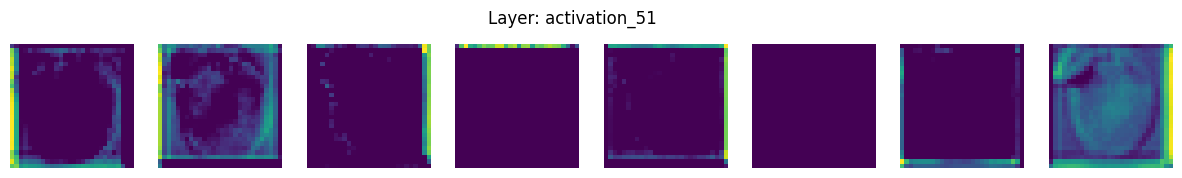

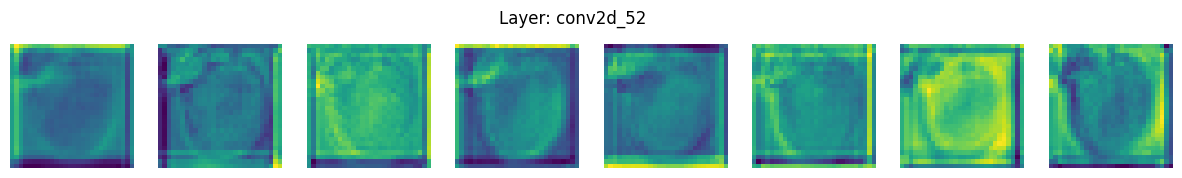

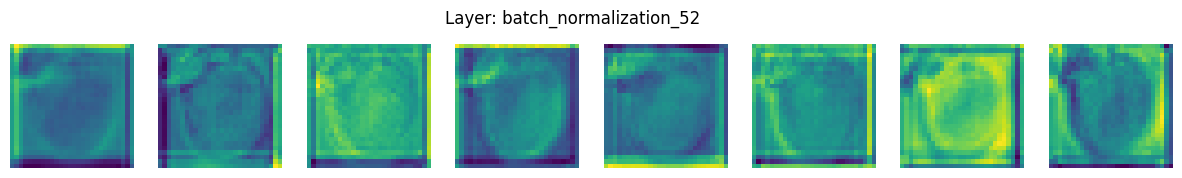

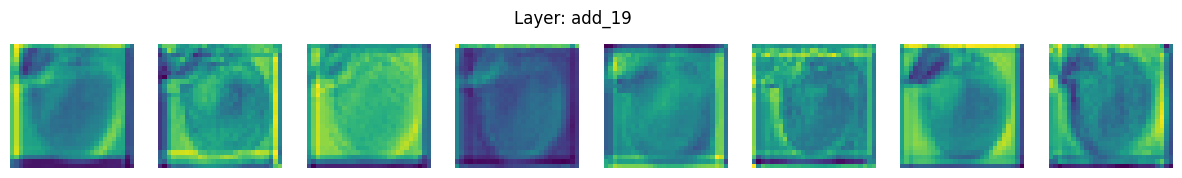

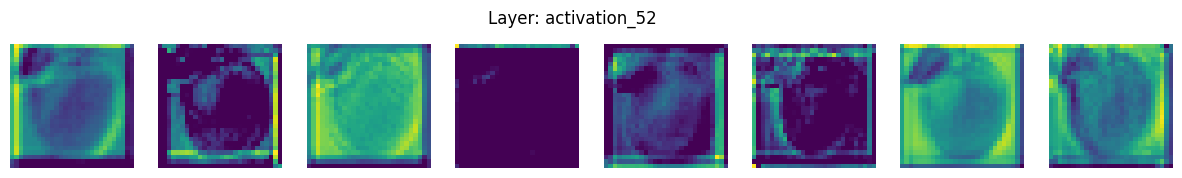

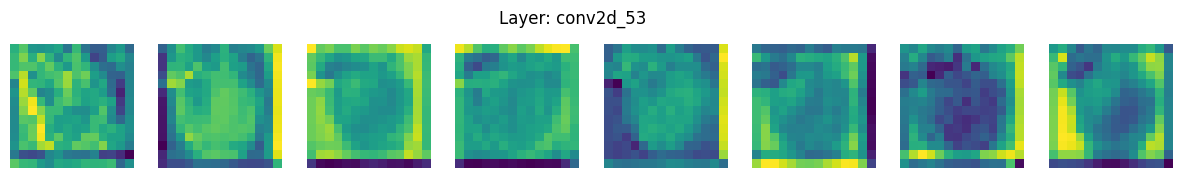

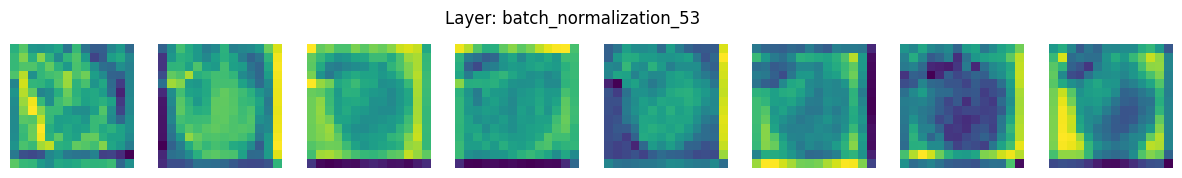

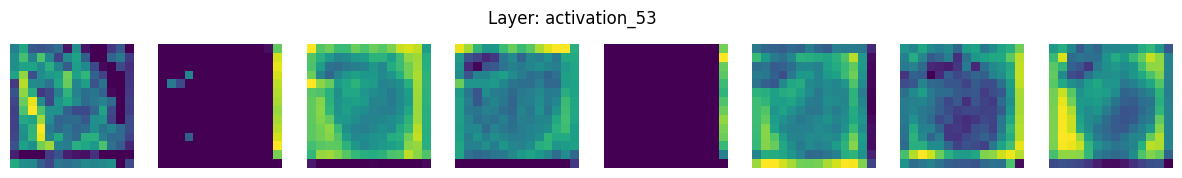

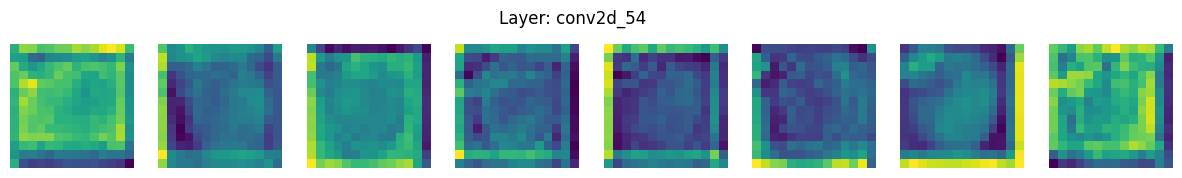

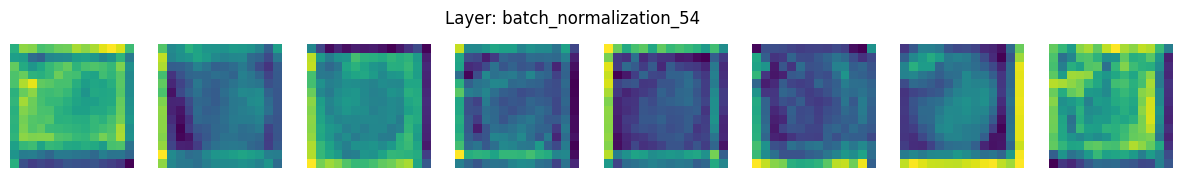

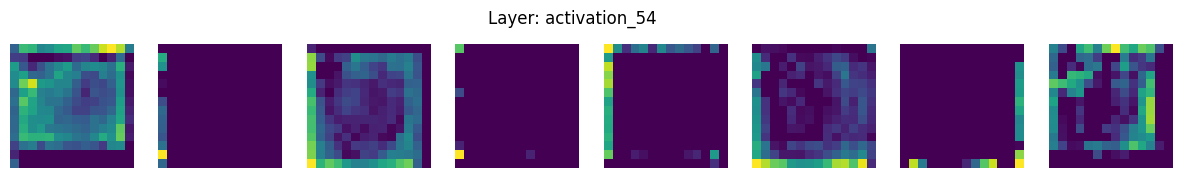

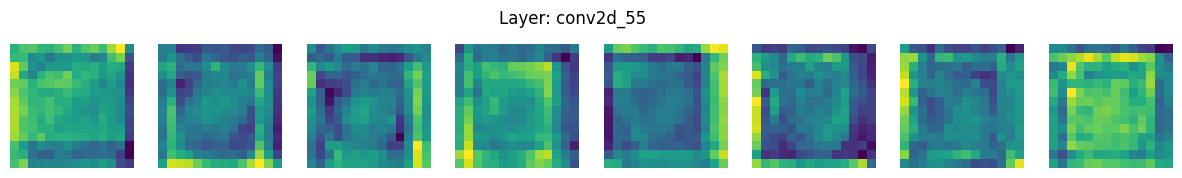

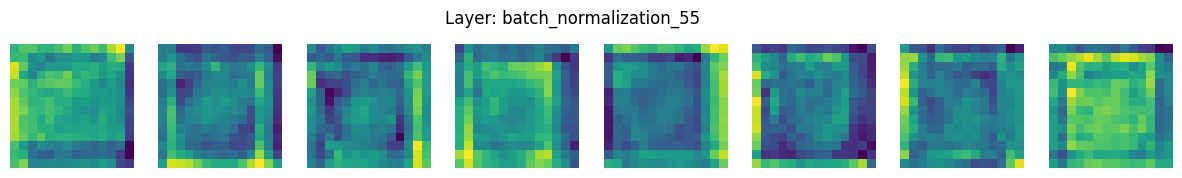

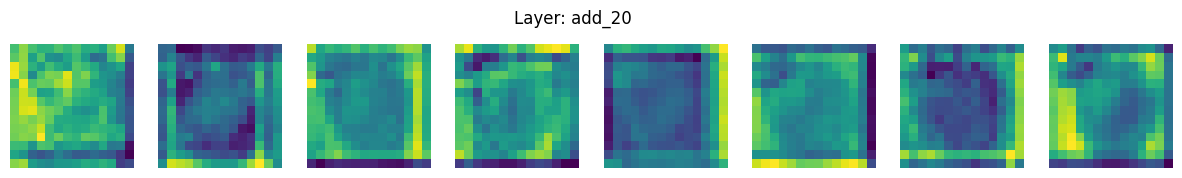

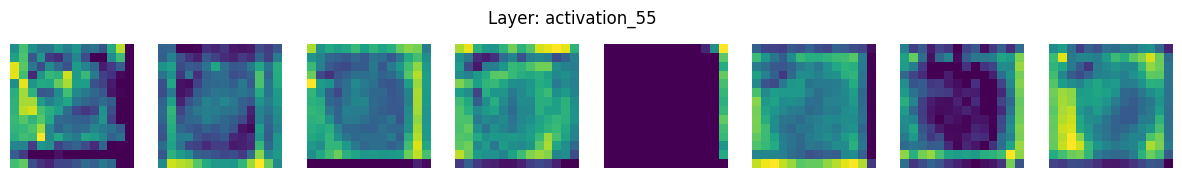

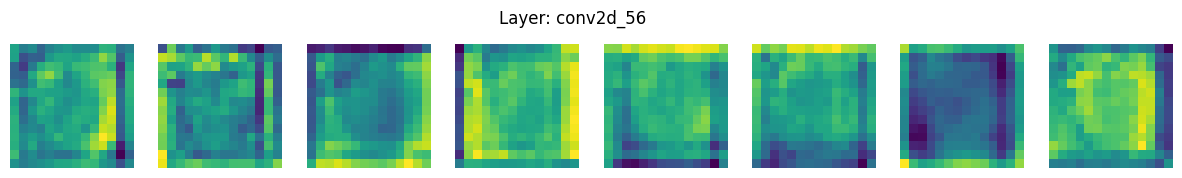

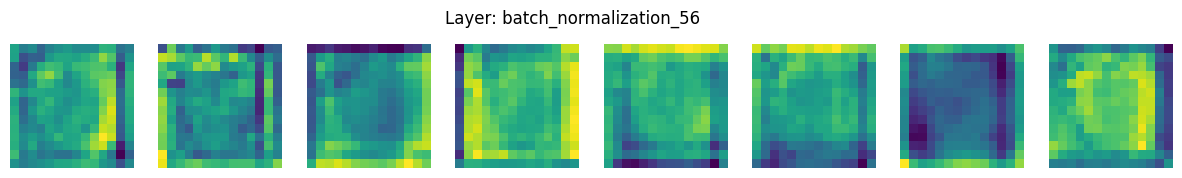

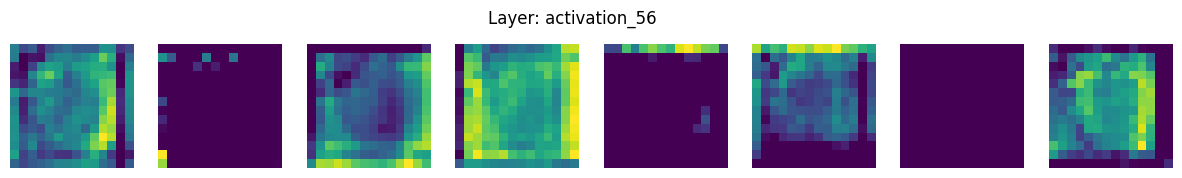

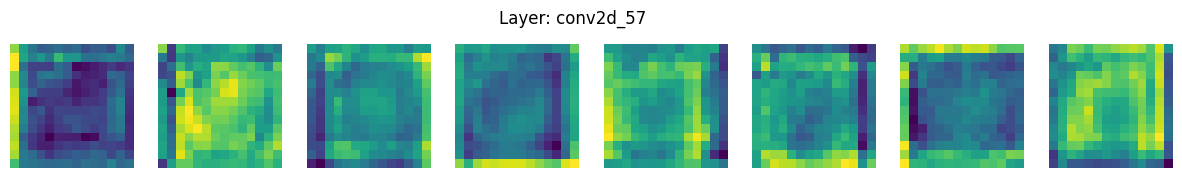

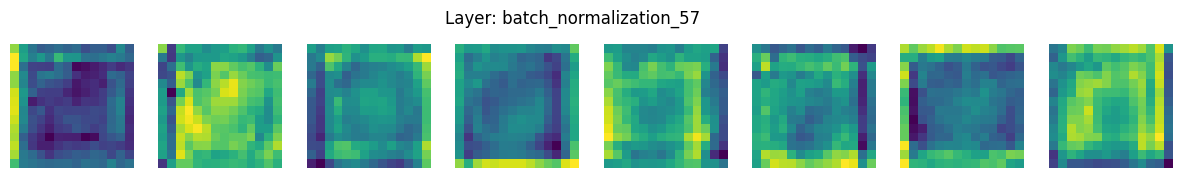

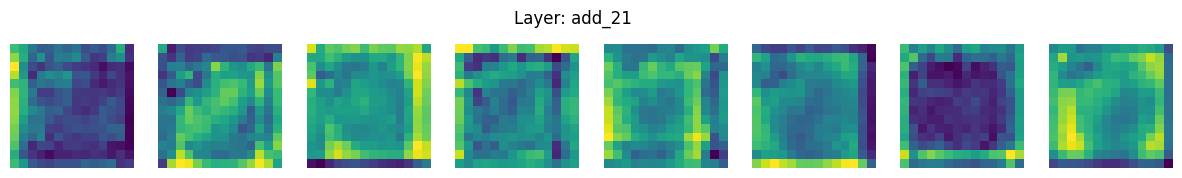

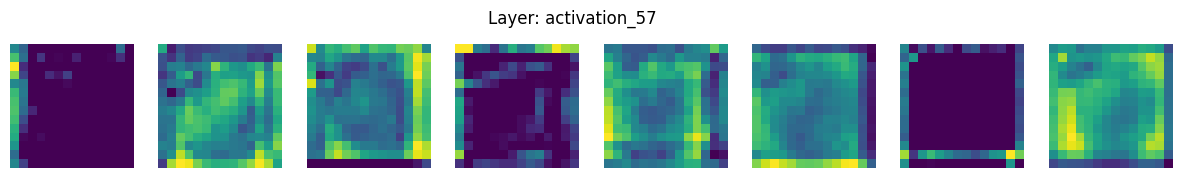

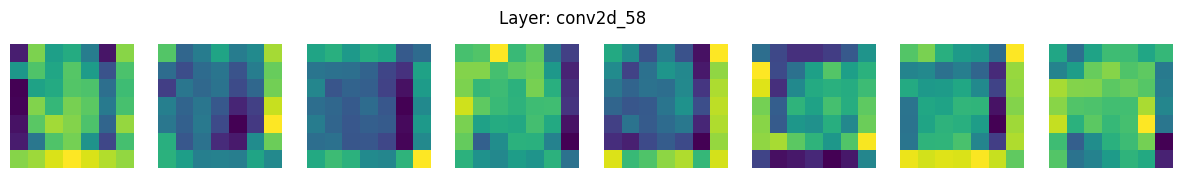

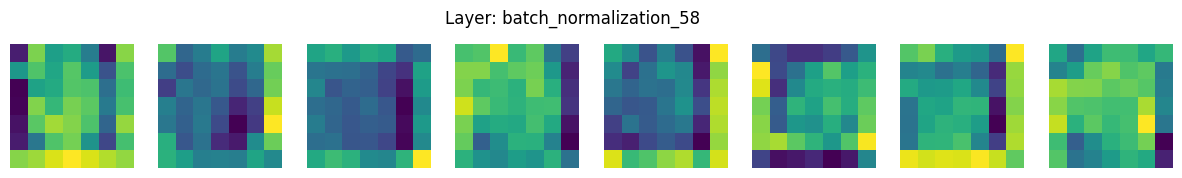

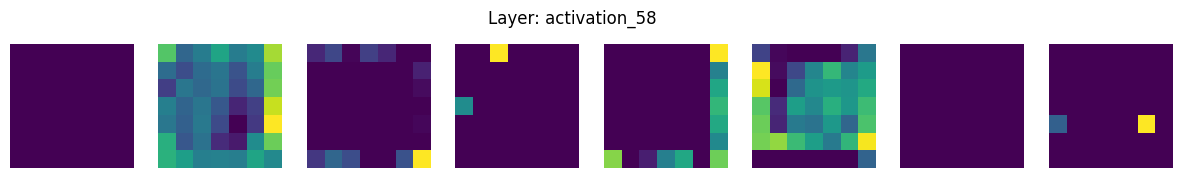

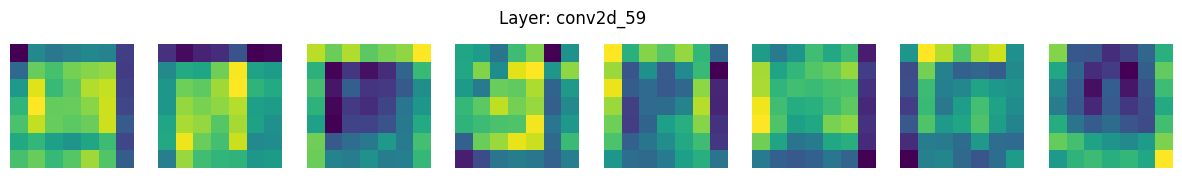

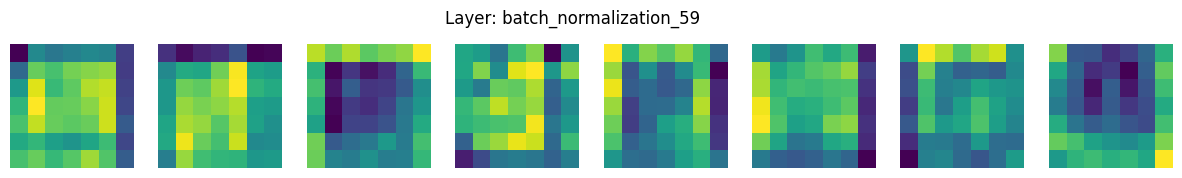

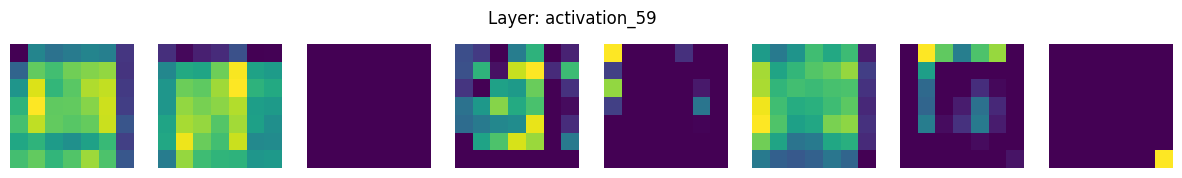

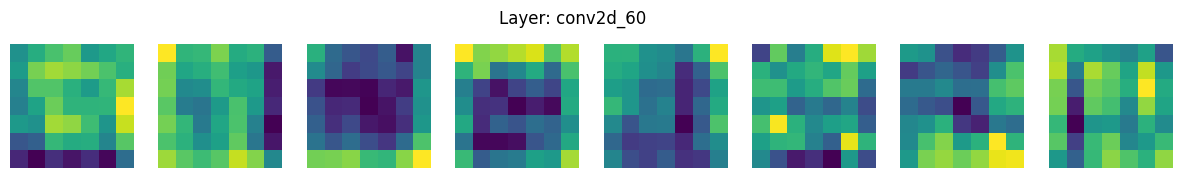

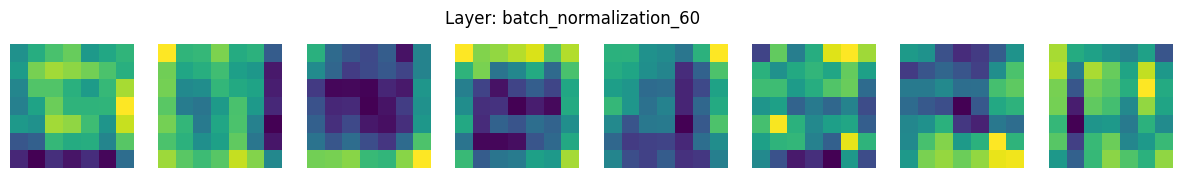

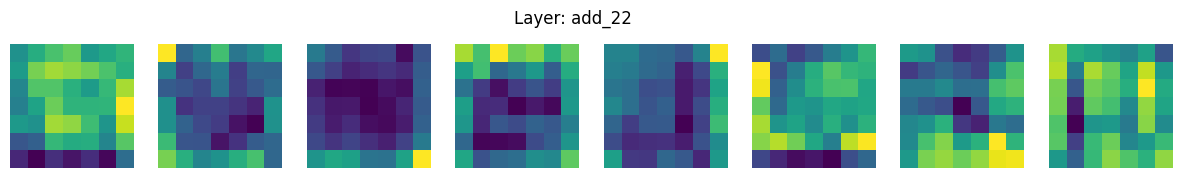

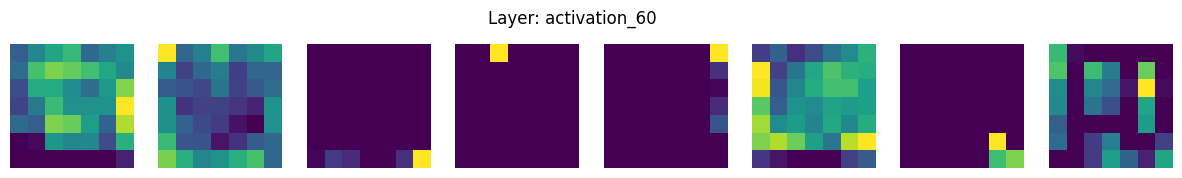

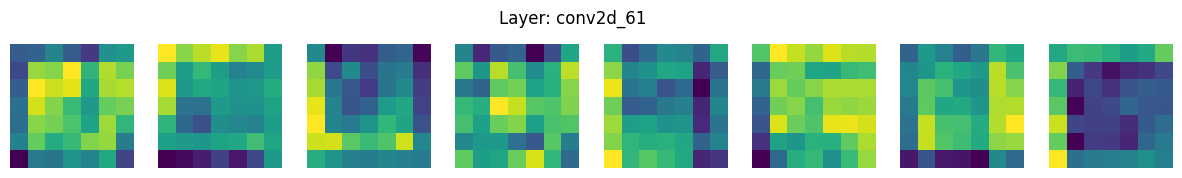

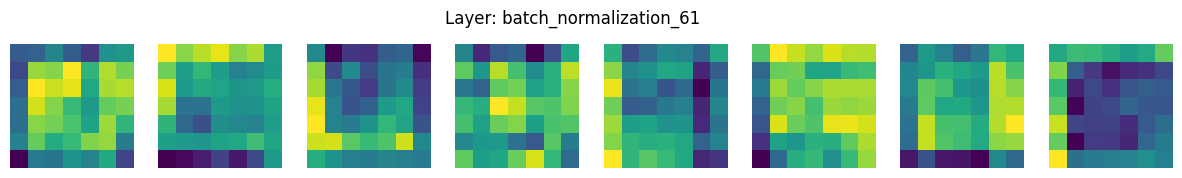

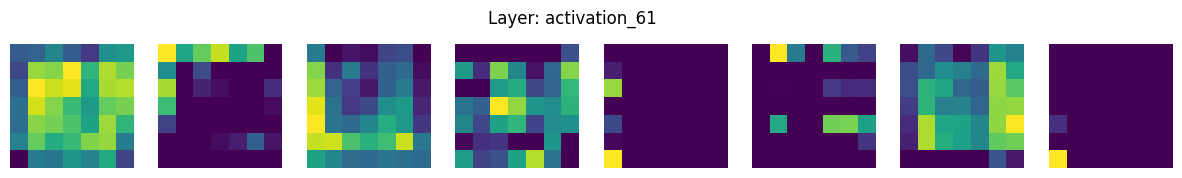

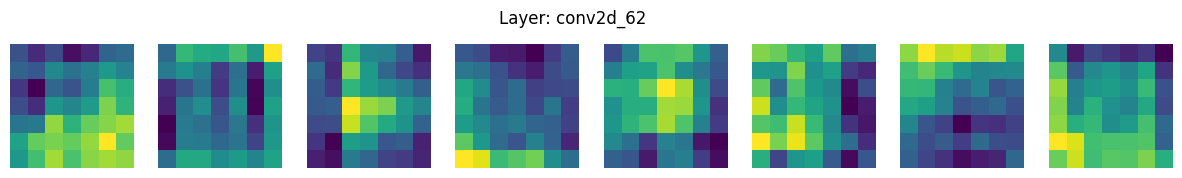

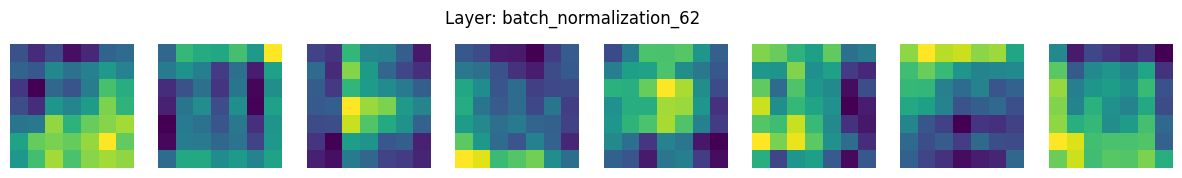

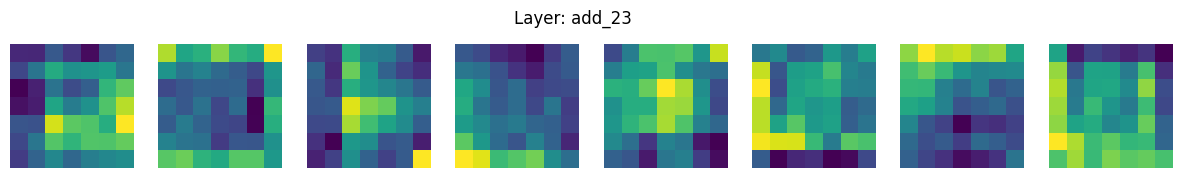

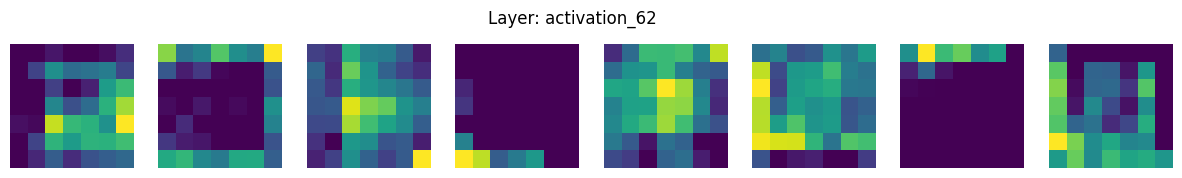

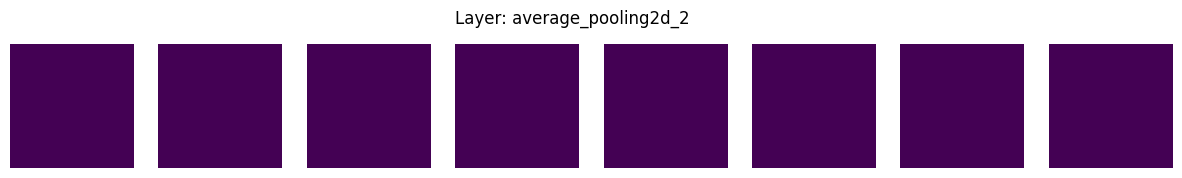

In [ ]:
# Get the activations for each layer using the uploaded image
activations = feature_extraction_model.predict(img_array)

# Visualize the feature maps of each layer
layer_names = [layer.name for layer in resnet50_model.layers]

for layer_name, layer_activation in zip(layer_names, activations):
    # Skip layers that don't have 4-dimensional feature maps (e.g., activation layers)
    if len(layer_activation.shape) != 4:
        continue

    # Plot the feature maps for the first few channels of each layer
    num_channels = min(8, layer_activation.shape[-1])
    size = layer_activation.shape[1]

    fig, ax = plt.subplots(1, num_channels, figsize=(15, 2))
    fig.suptitle(f'Layer: {layer_name}')

    for channel_idx in range(num_channels):
        ax[channel_idx].imshow(layer_activation[0, :, :, channel_idx], cmap='viridis')
        ax[channel_idx].axis('off')

    plt.show()
